In [34]:
import reservoirpy as rpy
import numpy as np
from reservoirpy.node import Node
import matplotlib.pyplot as plt

# 1. グローバルパラメータの設定
rpy.verbosity(0)  # 詳細なログは不要
rpy.set_seed(42)  # 再現性を確保

In [35]:
class LIFNeuron(Node):
    def __init__(self, threshold=1.0, reset_value=0.0, decay=0.95, input_dim=None, output_dim=None, name="LIFNeuron", **kwargs):
        # LIFニューロンの閾値、リセット値、減衰率を定義
        self.threshold = threshold
        self.reset_value = reset_value
        self.decay = decay
        self.initial_state = None
        
        # 親クラスの初期化を呼び出す（forward関数とinitializerを設定）
        super().__init__(forward=self.lif_forward, initializer=self.lif_initialize, input_dim=input_dim, output_dim=output_dim, name=name, **kwargs)
    
    def lif_forward(self, node, x):
        """
        LIFニューロンの前向き計算（forward計算）
        x: 入力信号
        node: ノードオブジェクト（自分自身）
        """
        if self.initial_state is None:
            self.initial_state = np.zeros(self.output_dim)
        
        # 前の状態に対して減衰を適用し、入力を加算
        self.initial_state = self.decay * self.initial_state + x

        # 発火条件のチェック
        spikes = np.where(self.initial_state >= self.threshold, 1.0, 0.0)  # 発火が起きたら1、起きなければ0
        self.initial_state = np.where(self.initial_state >= self.threshold, self.reset_value, self.initial_state)  # 発火後はリセット

        return spikes

    def lif_initialize(self, node, x=None, y=None):
        """
        LIFニューロンの初期化
        """
        if x is not None:
            node.set_input_dim(x.shape[1])
            node.set_output_dim(x.shape[1])

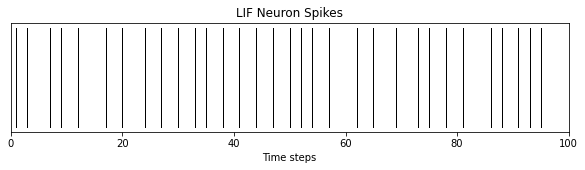

In [36]:
if __name__ == "__main__":
    # テストのための入力データ
    inputs = np.random.rand(100, 1)  # 100タイムステップ、1次元のダミー入力データ

    # LIFノードの作成
    lif_neuron = LIFNeuron(threshold=1.0, reset_value=0.0, decay=0.95, input_dim=1, output_dim=1)

    # ノードの初期状態（膜電位）をゼロで初期化
    lif_neuron.initialize(x=inputs)

    # ノードを通じた処理
    spikes = []

    for input_t in inputs:
        spikes_t = lif_neuron.run(input_t)
        spikes.append(spikes_t)

    # スパイクを線で可視化
    spikes = np.array(spikes).reshape(100, 1)

    plt.figure(figsize=(10, 2))  # 縦軸を無視して横に長い図を描画
    plt.title("LIF Neuron Spikes")

    # 発火したタイムステップにのみ点をプロット
    for t, spike in enumerate(spikes):
        if spike > 0:
            plt.plot([t, t], [0, 0.5], color='k', linestyle='-', linewidth=1)  # 発火したタイムステップに短い黒い縦線を表示

    plt.xlabel("Time steps")
    plt.yticks([])  # 縦軸のラベルを非表示に
    plt.xlim(0, 100)
    plt.show()